In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
datapath = ('https://raw.githubusercontent.com/theloyal6er/U3L2_HeartDiseaseRandomForest/master/HeartDisease.csv')

In [4]:
dataraw = pd.read_csv(datapath)

In [52]:
dataraw.head()

,Age,Sex,ChestPain,RestingBP,Cholestoral,BloodSugar,ECGResults,MaxHeartRate,ExerciseInducedAngina,OldPeak,SlopePeak,MajorVessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataraw.columns = ['Age','Sex','ChestPain','RestingBP','Cholestoral','BloodSugar','ECGResults','MaxHeartRate',
                      'ExerciseInducedAngina','OldPeak','SlopePeak','MajorVessels','Thalassemia','Target']

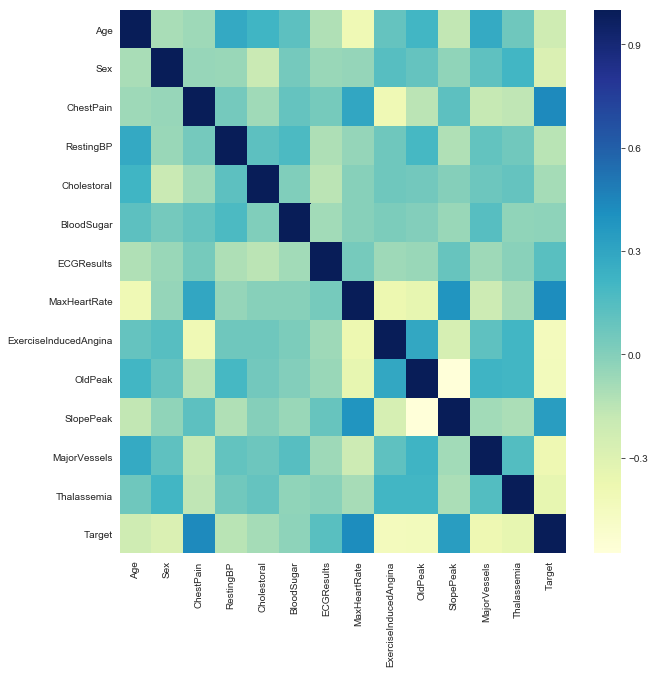

In [7]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataraw.corr(),cmap="YlGnBu")

In [9]:
from sklearn.linear_model import LogisticRegression
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
logreg = LogisticRegression(C=1e9)
Y1 = dataraw['Target']
X1 = dataraw[['ChestPain', 'ECGResults','MaxHeartRate','SlopePeak']]

# Fit the model.
fitlog = logreg.fit(X1, Y1)

# Display.
print('Coefficients')
print(fitlog.coef_)
print(fitlog.intercept_)
pred_y_sklearn = logreg.predict(X1)

print('\n Accuracy by Target')
print(pd.crosstab(pred_y_sklearn, Y1))

print('\n Percentage accuracy')
print(logreg.score(X1, Y1))

Coefficients
[[0.85312807 0.50261369 0.02903947 0.8780064 ]]
[-6.43315398]

 Accuracy by Target
Target   0    1
row_0          
0       96   35
1       42  130

 Percentage accuracy
0.7458745874587459


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
from sklearn.linear_model import Ridge
Y2 = dataraw['Target'].values.reshape(-1, 1)
X2 = dataraw.loc[:, ~(dataraw.columns).isin(['Target'])]
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgefit = ridgeregr.fit(X2, Y2)
origparams = ridgeregr.coef_[0]

print('Ridge Regression Score')
print(ridgeregr.score(X2, Y2))
print('\n Ridge Coefficients')
print(origparams)

Ridge Regression Score
0.5034168650357417

 Ridge Coefficients
[ 3.04110973e-03 -1.50526200e-01  1.10474365e-01 -8.05739185e-04
 -1.32788290e-04  2.92082596e-04  6.48104946e-02  5.13910434e-03
 -1.06969290e-01 -5.81073998e-02  7.87413122e-02 -1.02229049e-01
 -1.00866666e-01]


In [58]:
from sklearn.linear_model import Lasso
#Y2 = dataraw['Target'].values.reshape(-1, 1)
#X2 = dataraw.loc[:, ~(dataraw.columns).isin(['Target'])]
lassoregr = linear_model.Lasso(alpha=.005, fit_intercept=False) 
lassofit = lassoregr.fit(X2, Y2)
orig2params = np.append(lassofit.coef_, lassofit.intercept_)

print('Lasso Regression Score')
print(lassoregr.score(X2, Y2))
print('\n Lasso Coefficients')
print(orig2params)

Lasso Regression Score
0.5027107444333914

 Lasso Coefficients
[ 2.92557821e-03 -1.53916605e-01  1.10587945e-01 -8.33024874e-04
 -1.52998470e-04 -0.00000000e+00  5.46988184e-02  5.25841357e-03
 -1.01311958e-01 -5.78866083e-02  7.31022708e-02 -1.00818450e-01
 -9.68358877e-02  0.00000000e+00]


In [65]:
dataraw.head()

,Age,Sex,ChestPain,RestingBP,Cholestoral,BloodSugar,ECGResults,MaxHeartRate,ExerciseInducedAngina,OldPeak,SlopePeak,MajorVessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
X3 = dataraw[['Age','ChestPain','BloodSugar','ECGResults','MaxHeartRate','SlopePeak']]

In [76]:
from sklearn.linear_model import Ridge
Y2 = dataraw['Target'].values.reshape(-1, 1)
#X2 = dataraw.loc[:, ~(dataraw.columns).isin(['Target'])]
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgefit = ridgeregr.fit(X3, Y2)
origparams = ridgeregr.coef_[0]

print('Ridge Regression Score')
print(ridgeregr.score(X3, Y2))
print('\n Ridge Coefficients')
print(origparams)

Ridge Regression Score
0.3309093709878188

 Ridge Coefficients
[-0.00696456  0.16369717 -0.03177795  0.064292    0.00352859  0.15022524]


In [77]:
from sklearn.linear_model import Lasso
#Y2 = dataraw['Target'].values.reshape(-1, 1)
#X2 = dataraw.loc[:, ~(dataraw.columns).isin(['Target'])]
lassoregr = linear_model.Lasso(alpha=.005, fit_intercept=False) 
lassofit = lassoregr.fit(X3, Y2)
orig2params = np.append(lassofit.coef_, lassofit.intercept_)

print('Lasso Regression Score')
print(lassoregr.score(X3, Y2))
print('\n Lasso Coefficients')
print(orig2params)

Lasso Regression Score
0.32995678690162533

 Lasso Coefficients
[-0.00702571  0.16313192 -0.00097894  0.0554946   0.00353723  0.1520534
  0.        ]


### Advanced Regression Challenge

I found a dataset on Kaggle that had different variables that contributed towards a "Target" which was a binary outcome column that explained whether a patient had Heart Disease or not. I used a correlation heat map to get a general sense of how the variables positively/negatively correlated to the Target variable. 

For the logistic regression, I honed in on the correlation between the top four most positively correlated variables to match against my Y-target variable. For the Ridge and Lasso regressions, I ran the model with all the variables against my Y-target variable to determine the respective regression scores. Logistic Regression scores ended up with the highest accuracy with nearly 74.5% versus ~50%. I decided also to remove all the negatively correlated variables and re-run the models itself but the accuracy went down more - this showed that the model depended on even the negatively correlated variables to improve the overall accuracy.

The Ridge and Lasso regressions can often take away what the model can hone in as "useless" variables but if the overall strength of the variables are weak to begin with, the engrained PCA rules the regression math does can often take away from the overall accuracy of the models. The logistic regression worked the best of its logarithmic fingerprint in the model to better fit the data's nature. The data must not have been as strong to properly fit a Ridge or Lasso regression and in turn the logistic regression gave a better and more holistic understanding of the model itself.